In [5]:
# Install the packages necessary for the program
!pip install numpy
!pip install matplotlib
!pip install panda
!pip seaborn
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=a6e5fa5827722e5982ae3de49e893581f834b01007b8abad76943d03d49ac85d
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda
ERROR: unknown command "seaborn" - maybe you meant "search"


In [6]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [8]:
data=pd.read_csv('/content/HealthCareDiabetes.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.shape

(768, 9)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#checking whether the given set as any nullvalues or not
print(data.isnull())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [16]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


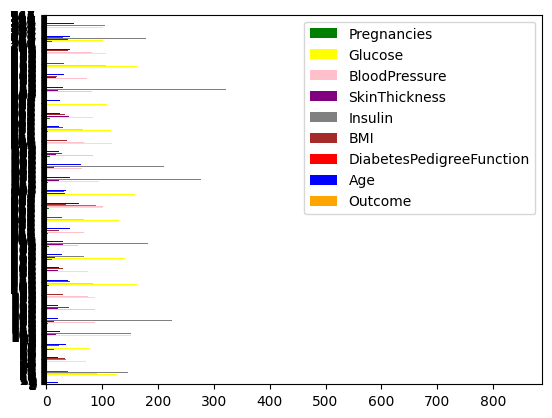

<Figure size 600x800 with 0 Axes>

In [18]:
data.plot(kind = 'barh' , color = ['green', 'yellow','pink','purple','grey','brown','red','blue','orange'])
plt.figure(figsize=(6, 8))
plt.show()

In [19]:
# Without the code repetetion we are using for loop for calculating mean of the columns
for column in data.columns:
    print(f"{column}: {data[column].mean()}")

Pregnancies: 3.8450520833333335
Glucose: 120.89453125
BloodPressure: 69.10546875
SkinThickness: 20.536458333333332
Insulin: 79.79947916666667
BMI: 31.992578124999998
DiabetesPedigreeFunction: 0.47187630208333325
Age: 33.240885416666664
Outcome: 0.3489583333333333


In [20]:
#Here we are calculating the null values in each column
null_value_count = {}
for column in data.columns:
    null_value_count[column] = len(data[data[column] == 0])
for column, count in null_value_count.items():
    print(f"{column}: {count}")
print(null_value_count)

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500}


In [21]:
# Finding the null value percentage
for column in data.columns:
    null_percentage = (data[column] == 0).mean() * 100
    print(f"{column}: {null_percentage:.2f}%")
# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Pregnancies: 14.45%
Glucose: 0.65%
BloodPressure: 4.56%
SkinThickness: 29.56%
Insulin: 48.70%
BMI: 1.43%
DiabetesPedigreeFunction: 0.00%
Age: 0.00%
Outcome: 65.10%
Percentage of Null Values for Each Column:
65.10416666666666


In [22]:
#Repalcing the null values in columns with mean of the column
for column in data.columns:
    data[column] = data[column].replace(0, data[column].mean())

In [26]:
#Checking the the null value percentage of the treated columns
null_percentages = (data[data.columns]==0).mean() * 100
print("Percentage of Null Values for Each Column:")
print(null_percentages)

Percentage of Null Values for Each Column:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [27]:
columns=data

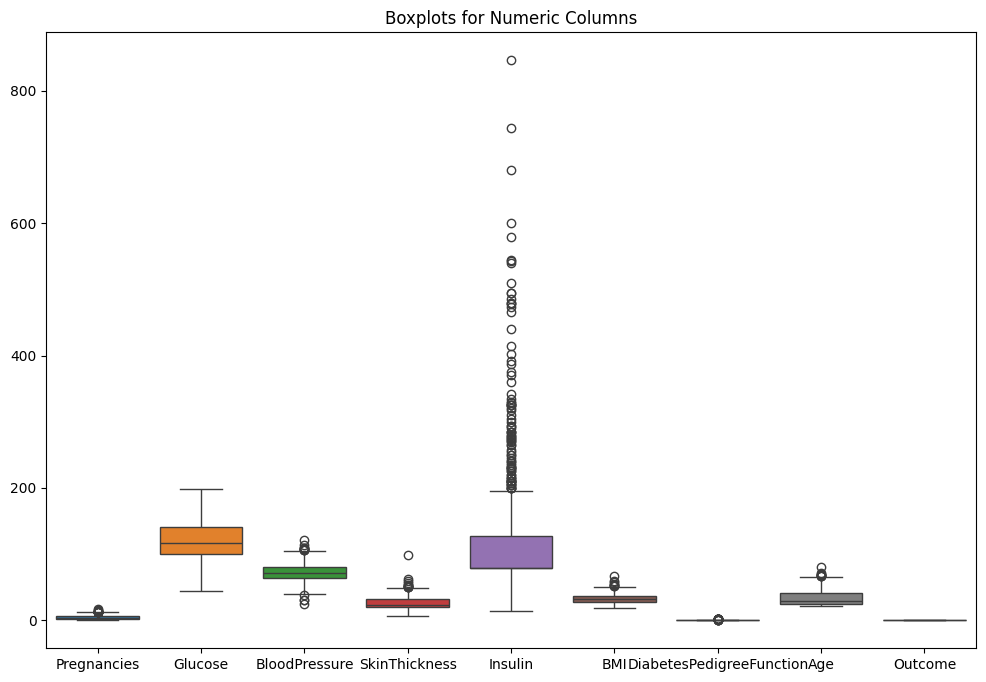

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [29]:
# Define a function to identify outliers using IQR
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Pregnancies' column: 14
Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8
Number of outliers in the 'DiabetesPedigreeFunction' column: 29
Number of outliers in the 'Age' column: 9
Number of outliers in the 'Outcome' column: 0


In [30]:
# Handle outliers
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  5.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      0.651042
dtype: float64


In [31]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(687, 9)
(768, 9)


In [32]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.000000
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.348958
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.000000
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.348958
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0.348958
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.348958
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.348958
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.348958
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1.000000


In [38]:
columns=data

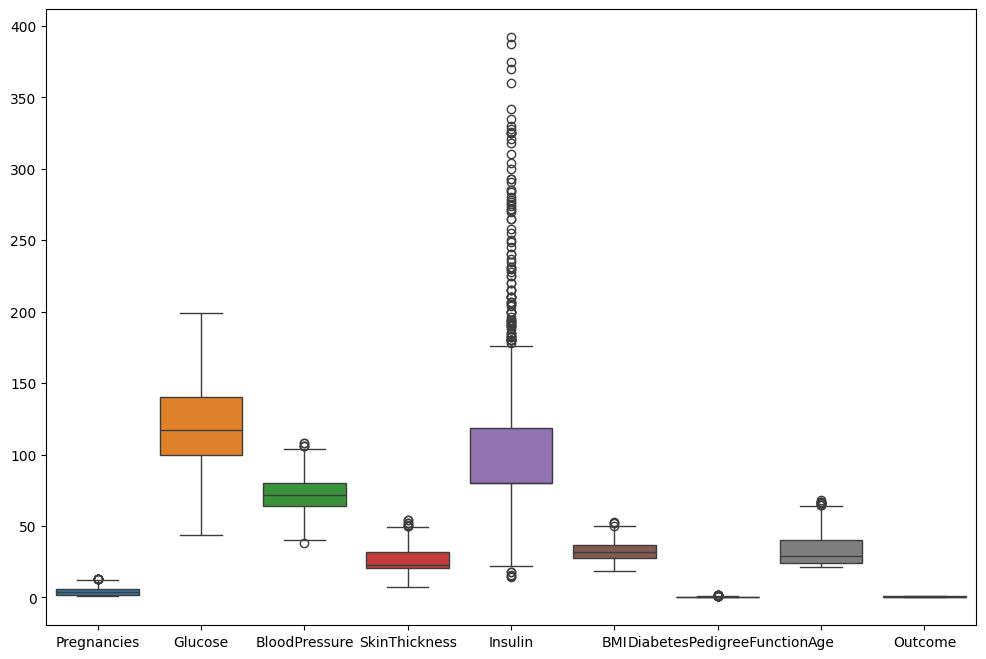

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.show()